### 실습
sklearn 타이타닉 생존자 예측

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
titanic_df = pd.read_csv('./data/titanic_train.csv')
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
titanic_df.shape

(891, 12)

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 결측치 파악

In [6]:
titanic_df['Age'].isnull().sum()

177

In [7]:
titanic_df['Cabin'].isnull().sum()

687

In [8]:
titanic_df['Embarked'].isnull().sum()

2

Null 값 처리
- age = 평균나이
- 나머지 N 대체

In [10]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df.fillna('N', inplace = True)

titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

문자열 변수 빈도 분포 확인

In [13]:
print('Sex 분포 : \n', titanic_df['Sex'].value_counts())
print('\nCabin 분포 : \n', titanic_df['Cabin'].value_counts())
print('\nEmbarked 분포 : \n', titanic_df['Embarked'].value_counts())

Sex 분포 : 
 male      577
female    314
Name: Sex, dtype: int64

Cabin 분포 : 
 N              687
G6               4
C23 C25 C27      4
B96 B98          4
C22 C26          3
              ... 
T                1
E77              1
A7               1
A20              1
A23              1
Name: Cabin, Length: 148, dtype: int64

Embarked 분포 : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [14]:
# 선실 번호만 가져옴
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

### 성별에 따른 생존자 분포

In [18]:
# 성별 분포 확인
titanic_df.groupby('Sex')['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

In [21]:
# 생존 유무에 분포
titanic_df.groupby('Survived')['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [20]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

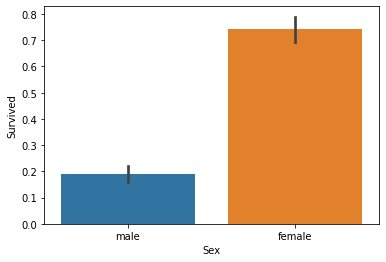

In [24]:
# 성별 생존자 그래프

sns.barplot(x='Sex', y='Survived', data = titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

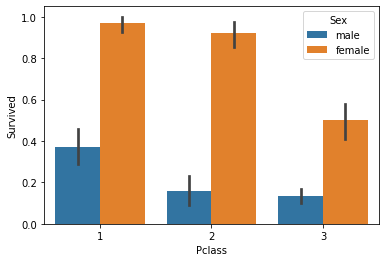

In [25]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data = titanic_df)

### 구간화(binning)

In [26]:
def get_category(age):
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else: cat = 'Elderly'
    return cat

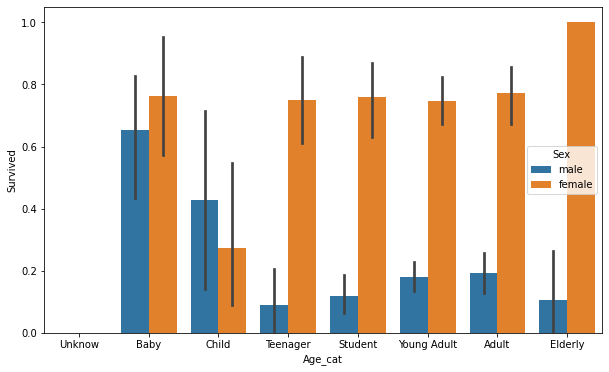

In [28]:
plt.figure(figsize=(10,6))
group_names = ['Unknow', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data = titanic_df, order = group_names)

titanic_df.drop('Age_cat', axis = 1, inplace = True)